In [5]:
#@title GitHub Token Ekle

import ipywidgets as widgets
from IPython.display import display
import os

def github_token_button_clicked(b):
    os.environ["GITHUB_TOKEN"] = "REMOVED_TOKEN"
    print("GitHub Token ortam değişkenine eklendi!")

button1 = widgets.Button(
    description="GitHub Token Ekle",
    button_style='',
    tooltip='GitHub Token Ortam Değişkenine Ekle'
)
button1.on_click(github_token_button_clicked)
display(button1)

Button(description='GitHub Token Ekle', style=ButtonStyle(), tooltip='GitHub Token Ortam Değişkenine Ekle')

GitHub Token ortam değişkenine eklendi!


In [6]:
#@title GitHub Token Ekle

import ipywidgets as widgets
import os
import datetime
from google.colab import drive
from IPython.display import display

def sync_drive_github(b):
    # Google Drive'ı bağla
    drive.mount('/content/drive', force_remount=True)

    # Git kullanıcı bilgilerini ayarla
    os.system('git config --global user.email "doganzub@gmail.com" > /dev/null 2>&1')
    os.system('git config --global user.name "doganzub" > /dev/null 2>&1')

    # GitHub Token kontrolü
    GITHUB_TOKEN = os.environ.get("GITHUB_TOKEN")
    if not GITHUB_TOKEN:
        print("❌ HATA: GitHub Token bulunamadı! Lütfen önce Buton 1 ile ayarlayın.")
        return

    # GitHub repo bağlantısı
    GITHUB_REPO = f"https://{GITHUB_TOKEN}@github.com/doganzub/ml.git"

    # Çalıştırılan notebook'un yolu ve adı (manuel düzenleyin)
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/"
    running_notebook = "4_basit_dogReg.ipynb"

    # Repo yoksa klonla
    if not os.path.exists("/content/ml"):
        os.system(f"cd /content && git clone {GITHUB_REPO}")

    # Git dizinine geç
    os.chdir("/content/ml")

    # Branch listesini al
    os.system("git fetch --all")
    existing_branches = os.popen("git branch -r").read()

    filename_parts = running_notebook.split("_")
    if not filename_parts[0].isdigit():
        print(f"🚫 {running_notebook} dosyasının başında rakam yok, işlem iptal edildi!")
    else:
        ders_no = filename_parts[0]
        branch_name = f"ders{ders_no}"

        if f"origin/{branch_name}" not in existing_branches:
            print(f"🚫 {branch_name} branch'i GitHub'da bulunamadı, işlem iptal edildi!")
        else:
            os.system(f"git checkout {branch_name}")
            os.system(f'cp "{notebook_path}{running_notebook}" "/content/ml/"')
            commit_message = f"{running_notebook} güncellendi - {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}"
            os.system("git add .")
            status = os.popen("git status --porcelain").read()

            if status.strip():
                os.system(f'git commit -m "{commit_message}"')
                os.system(f"git push origin {branch_name}")
                print(f"✅ {running_notebook} {branch_name} branch'ine yüklendi!")
            else:
                print(f"⚡ {running_notebook} için değişiklik yok, commit atlanıyor!")
            os.system(f'cp -f "/content/ml/{running_notebook}" "{notebook_path}"')

    print("🎯 GitHub ve Google Drive senkronize edildi!")

# Buton 2: Drive & GitHub Senkronizasyonu
button2 = widgets.Button(
    description="Drive & GitHub Senkronizasyonu",
    button_style='',
    tooltip='Google Drive ve GitHub arasında senkronizasyon yap'
)
button2.on_click(sync_drive_github)
display(button2)

Button(description='Drive & GitHub Senkronizasyonu', style=ButtonStyle(), tooltip='Google Drive ve GitHub aras…

Mounted at /content/drive
✅ 4_basit_dogReg.ipynb ders4 branch'ine yüklendi!
🎯 GitHub ve Google Drive senkronize edildi!


# Basit Doğrusal Regresyon: Gelir ve Mutluluk İlişkisi

Bu projede, bireylerin yıllık gelir düzeyi ile öznel mutluluk puanları arasındaki ilişki, **basit doğrusal regresyon analizi** yöntemiyle incelenmiştir. Analiz süreci; veri ön işleme, keşifsel veri analizi, model kurma, performans değerlendirme ve sonuçların grafiksel sunumu olmak üzere beş temel adımdan oluşmaktadır.

Veriler 498 bireye ait gelir ile mutluluk düzeylerini içeren hayali bir veri setinden elde edilmiştir. Amaç, gelir düzeyinin mutluluğu ne ölçüde açıkladığını regresyon modeli ile test etmek ve bu doğrusal ilişkinin gücünü ortaya koymaktır.

---

## Teorik Temeller: Basit Doğrusal Regresyon

Basit doğrusal regresyon, bir **bağımsız değişken (X)** ile bir **bağımlı değişken (Y)** arasındaki doğrusal ilişkiyi analiz etmeye yarayan istatistiksel bir yöntemdir. Model, iki değişken arasındaki ilişkiyi bir doğru (lineer denklem) aracılığıyla temsil eder ve bu sayede bağımsız değişkenin bilinen bir değeri üzerinden bağımlı değişkenin tahmini yapılabilir.

### Modelin Matematiksel Gösterimi:


```
Y = β₀ + β₁ * X + ε
```


- **Y**: Bağımlı değişken (örneğin, mutluluk puanı)  
- **X**: Bağımsız değişken (örneğin, gelir düzeyi)  
- **β₀**: Sabit terim (intercept); X = 0 iken Y’nin tahmini değeri  
- **β₁**: Eğim katsayısı; X’teki bir birimlik değişimin Y üzerindeki etkisi  
- **ε**: Hata terimi; modele dahil edilemeyen rastlantısal sapmaları ifade eder  

Modelin temel amacı, iki değişken arasındaki ilişkinin:

- **Yönünü** (pozitif ya da negatif),  
- **Gücünü** (korelasyonun derecesi)  
- Ve **istatistiksel anlamlılığını** (p-değeri) ortaya koymaktır.  

Ayrıca modelin veri üzerindeki açıklayıcılığı **R² katsayısı** ile değerlendirilir. R² değeri, modelin bağımlı değişkendeki toplam varyansın ne kadarını açıkladığını gösterir.

---

## 🔍 Neden Bu Çalışmayı Yapıyoruz?

Bu çalışma, sosyal bilimlerde sıkça karşılaşılan ekonomik refah ve öznel iyi oluş arasındaki ilişkiyi **ampirik verilerle** analiz etmeyi hedeflemektedir. Özellikle "gelir mutluluğu etkiler mi?" sorusu; kamu politikaları, bireysel tercih davranışları ve yaşam doyumu araştırmaları açısından kritik bir yere sahiptir.

Bu analiz çerçevesinde şu temel sorulara yanıt aranacaktır:

- Gelir ile mutluluk arasında **istatistiksel olarak anlamlı bir ilişki** var mıdır?  
- Bu ilişkinin **yönü ve büyüklüğü** nedir?  
- Gelir düzeyi bilinen bir bireyin mutluluk puanı **ne ölçüde tahmin edilebilir?**  
- Kurulan model, farklı örneklemler için **ne kadar genellenebilir?**  

Bu yönüyle çalışma, sosyal bilimsel araştırmalarda **nicel analiz tekniklerinin** nasıl uygulanabileceğini örneklemekte ve doğrusal regresyon modelinin gerçek dünya verileriyle kullanımını göstermektedir.


---

## 📁 Veri Seti Hakkında

Bu çalışmada kullanılan veri seti ([income.data.csv](https://www.scribbr.com/wp-content/uploads/2020/02/income.data_.zip)), Bevans (2023b) tarafından sunulan 500 kişilik hayali bir örneklemden oluşmaktadır. Veri setinde üç sütun bulunmaktadır:

| Nitelik Adı     | Türkçesi             | Veri Tipi |
|----------------|----------------------|-----------|
| Unnamed: 0     | Örnek numarası        | Ayrık     |
| income         | Gelir (bin $)         | Sürekli   |
| happiness      | Mutluluk puanı (1–10) | Sürekli   |

**Değişken Açıklamaları:**

- `income`: Bireylerin yıllık gelirleri, 15.000 ile 75.000 arasında değişmektedir. Bu değerler, analiz kolaylığı için 10.000’e bölünmüş (örneğin, 30.000 → 3.0) ve normalize edilmiştir.
- `happiness`: 1 ile 7 arasında derecelendirilen, bireylerin öznel mutluluk düzeyini ifade eden puanlardır.
- `Unnamed: Her bireyin örnek numarasını içeren sütundur; analiz dışında bırakılmıştır.

> Bu çalışmada yalnızca `income` ve `happiness` değişkenleri kullanılmıştır. Gelir, **bağımsız değişken** (predictor); mutluluk ise **bağımlı değişken** (target) olarak modellenmiştir.

---

## 🧪 Uygulama Süreci ve Analiz Aşamaları

### 1️⃣ Gerekli Kütüphanelerin Yüklenmesi
- `pandas`, `numpy`, `matplotlib`, `seaborn`, `statsmodels`, `sklearn` gibi analiz ve görselleştirme kütüphaneleri içe aktarılmıştır.

### 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz
- CSV dosyası yüklenmiş, ilk sütun çıkarılmış ve değişkenler Türkçeleştirilmiştir.  
- Dağılım, aykırı değerler ve eksik veri kontrolü yapılmış; scatter plot, box plot ve histogram ile görselleştirme sağlanmıştır.  
- Pearson korelasyon analizi yapılmıştır.

### 3️⃣ Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme
- Veri seti %70 eğitim, %30 test olarak ayrılmıştır.  
- `statsmodels` ile regresyon modeli oluşturulmuş ve model özeti alınmıştır.  
- Regresyon denklemi elde edilmiş ve katsayılar, p-değerleri, R² katsayısı değerlendirilmiştir.

### 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

- Aşağıdaki hata metrikleri hem manuel hem sklearn ile hesaplanmıştır:

| Metrik   | Tanım ve Yorum                                                                 |
|:--------:|:-------------------------------------------------------------------------------|
| **MAE**  | Ortalama mutlak sapma. Tahminlerin gerçek değerlerden ortalama ne kadar saptığını gösterir.                  |
| **MSE**  | Ortalama karesel sapma. Büyük hataları vurgular; sapmaların karelerinin ortalamasıdır.                       |
| **RMSE** | MSE’nin karekökü. Hataların gerçek birimdeki ortalama büyüklüğünü ifade eder; büyük sapmalardan daha fazla etkilenir. |

---

### 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi
- Gerçek değerler scatter plot ile, tahmin edilen değerler regresyon doğrusu olarak çizilmiştir.  
- Grafiksel sunum ile modelin başarı düzeyi görsel olarak değerlendirilmiştir.




---



---



---



## 1️⃣ Gerekli Kütüphaneler

In [7]:
import numpy as np                         # Sayısal işlemler için
import pandas as pd                        # Veri okuma ve düzenleme
import seaborn as sns                      # Veri görselleştirme
import matplotlib.pyplot as plt            # Grafik çizimi
from matplotlib.cbook import boxplot_stats # Aykırı değer tespiti için

from scipy.stats import pearsonr           # Korelasyon analizi
import statsmodels.formula.api as smf      # Regresyon modeli oluşturmak için
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Hata metrikleri

print("✅ Gerekli kütüphaneler başarıyla yüklendi.")


✅ Gerekli kütüphaneler başarıyla yüklendi.


## 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz

---

Bu bölümde, analizimizde kullanacağımız `income.data.csv` adlı veri seti Google Drive'dan okunarak yüklenmekte ve ilk aşamada veri temizleme, isimlendirme, özet istatistikler ve görselleştirmeler gerçekleştirilmektedir. Ayrıca, temel veri kontrolleri (eksik veri, aykırı değer ve korelasyon analizi) de bu aşamada yapılır. Bu adımlar, ileride kurulacak olan doğrusal regresyon modelinin sağlıklı ve anlamlı sonuçlar vermesi için ön koşuldur.

---

### 💰 Income & Happiness Veri Seti: Tanıtım

**Income & Happiness** veri seti, bireylerin **yıllık gelir düzeyi** ile **öznel mutluluk puanları** arasındaki ilişkiyi analiz etmek üzere oluşturulmuş, 500 gözlemden oluşan eğitim amaçlı bir veri setidir. Sade yapısı sayesinde hem ekonomik hem psikolojik veri analizlerinde örnek modelleme çalışmaları için ideal bir kaynak sunar.

#### Veri seti şu alanları içermektedir:

| Sütun Adı     | Açıklama                                                | Veri Tipi |
|--------------|----------------------------------------------------------|-----------|
| Unnamed: 0   | Gözlem numarası (analize dahil edilmez)                 | Ayrık     |
| income       | Yıllık gelir (bin $ cinsinden, 10.000'e bölünmüş hali)   | Sürekli   |
| happiness    | 1 ile 10 arasında öznel mutluluk puanı                   | Sürekli   |

- **income:** Örneğin 3.5 değeri, 35.000 $ yıllık gelire karşılık gelir. Gelir değerleri, 10.000’e bölünerek normalleştirilmiştir.
- **happiness:** 1 (çok mutsuz) ile 10 (çok mutlu) arasında bireylerin kendi beyan ettikleri mutluluk düzeyini ifade eder.
- **Unnamed: 0:** Gözlem sırasını temsil eden sütundur ve analiz dışında tutulur.

🔗 [Veri seti kaynağı – Bevans, 2023](https://www.scribbr.com/wp-content/uploads/2020/02/income.data_.zip)  
📄 **Kullanılan dosya:** `income.data.csv`

> Bu çalışmada yalnızca `income` ve `happiness` sütunları kullanılacaktır. Regresyon modelinde **income** bağımsız değişken, **happiness** bağımlı değişken olarak tanımlanmıştır.








Veri setinin ilk 6 satırı:


,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
5,6,3.729643,2.458556


Temel istatistikler:


,gelir,mutluluk
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


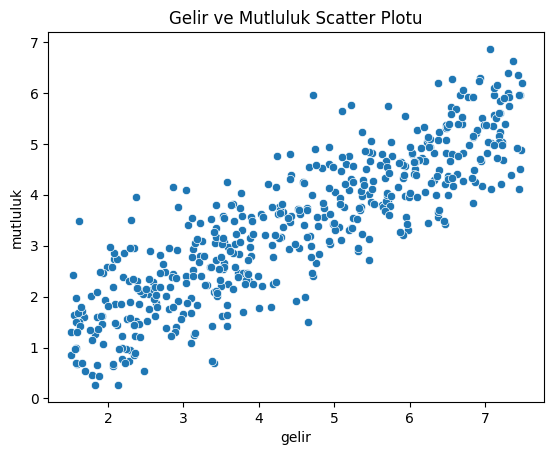

<ipython-input-4-4d16eae0ed9d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gelir", data=veriseti, palette="summer")


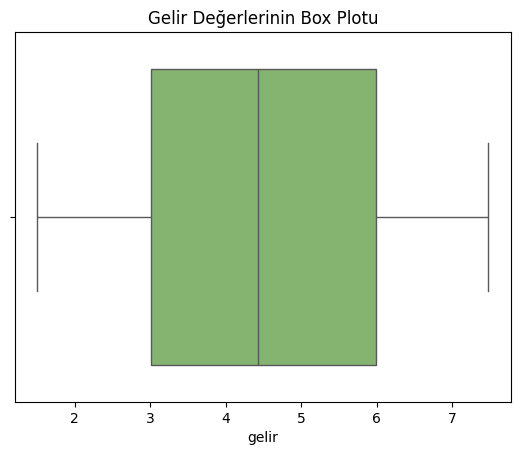

📌 Aykırı Değer Bilgisi (boxplot_stats): [{'mean': np.float64(4.466902362724138), 'iqr': np.float64(2.98565727949608), 'cilo': np.float64(4.213659166644111), 'cihi': np.float64(4.63376134232919), 'whishi': np.float64(7.48152138059959), 'whislo': np.float64(1.50627504475415), 'fliers': array([], dtype=float64), 'q1': np.float64(3.0062558561330675), 'med': np.float64(4.42371025448665), 'q3': np.float64(5.991913135629147)}]
📌 Eksik Değer Kontrolü:
 gelir       0
mutluluk    0
dtype: int64
📈 Pearson Korelasyon Katsayısı: 0.8656, p-değeri: 0.0000


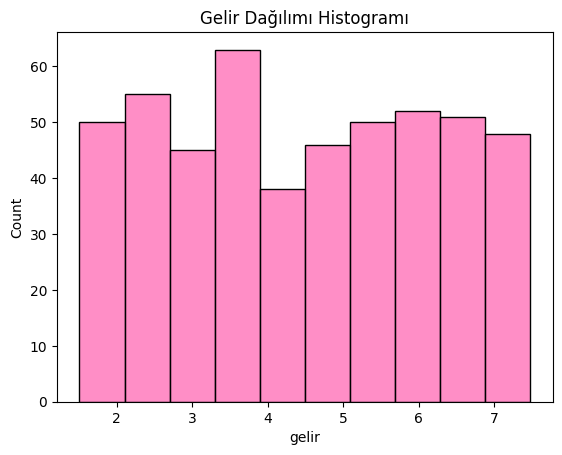

In [4]:
# Veri setini Google Drive'dan yüklüyoruz
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/income.data.csv'
veriseti = pd.read_csv(dosya_yolu)

# Veri setinin ilk 6 satırını görüntülüyoruz
print("Veri setinin ilk 6 satırı:")
display(veriseti.head(6))

# İlk sütunun veri setinden çıkarılması (gereksiz bilgi temizleniyor)
veriseti = veriseti.iloc[:, 1:3]

# Sütun adlarının değiştirilmesi
veriseti = veriseti.rename(columns={"income": "gelir", "happiness": "mutluluk"})

# Temel istatistiklerin incelenmesi
print("Temel istatistikler:")
display(veriseti.describe())

# Scatter plot: Gelir ve mutluluk ilişkisi
sns.scatterplot(x="gelir", y="mutluluk", data=veriseti)
plt.title('Gelir ve Mutluluk Scatter Plotu')
plt.show()

# Box plot: Gelir değişkenindeki aykırı değerleri gözlemleme
sns.boxplot(x="gelir", data=veriseti, palette="summer")
plt.title('Gelir Değerlerinin Box Plotu')
plt.show()

# Eksik ve aykırı değer kontrolü
print("📌 Aykırı Değer Bilgisi (boxplot_stats):", boxplot_stats(veriseti.gelir))

print("📌 Eksik Değer Kontrolü:\n", veriseti.isnull().sum())

# Pearson korelasyon analizi
corr, p_value = pearsonr(veriseti.gelir, veriseti.mutluluk)
print(f"📈 Pearson Korelasyon Katsayısı: {corr:.4f}, p-değeri: {p_value:.4f}")

# Histogram: Gelir değişkeninin dağılımı
sns.histplot(data=veriseti, x="gelir", color="hotpink")
plt.title('Gelir Dağılımı Histogramı')
plt.show()


## 📊 Veri Setinin Genel Yapısı ve İlk Gözlemler

Bu bölümde, gelir ve mutluluk değişkenlerinden oluşan veri setinin ilk 6 satırı ve temel istatistiksel özellikleri incelenmiştir. Analizler sonucunda aşağıdaki bulgular elde edilmiştir:


| Ölçüt       | Gelir (gelir) | Mutluluk (mutluluk) |
|-------------|----------------|----------------------|
| Gözlem Sayısı| 498            | 498                  |
| Ortalama     | 4.47           | 3.39                 |
| Standart Sapma| 1.74           | 1.43                 |
| Minimum      | 1.50           | 0.27                 |
| 25. Yüzdelik | 3.01           | 2.26                 |
| Medyan       | 4.42           | 3.47                 |
| 75. Yüzdelik | 5.99           | 4.50                 |
| Maksimum     | 7.48           | 6.86                 |


1. **Ortalama ve Medyanın Yakınlığı:** Hem gelir hem de mutluluk değişkeninde ortalama ile medyanın birbirine oldukça yakın olması, verinin simetrik ve dengeli bir dağılıma sahip olduğunu göstermektedir.

2. **Geniş Değer Aralıkları:** Gelir 1.5 ile 7.48, mutluluk ise 0.27 ile 6.86 arasında değişmektedir. Bu durum, bireyler arasında belirgin farklılıklar olduğunu ve varyansın yüksek olduğunu gösterir.

3. **Merkezi Eğilim:** Ortalama gelir değeri 4.47 olup, bireylerin büyük bir kısmı orta-üst gelir grubunda yer almaktadır. Benzer şekilde, mutluluk puanları da 3.39 ortalama ile orta düzeyde seyretmektedir.

---

---

##  Scatter Plot: Gelir ve Mutluluk Arasındaki İlişki

Scatter plot, gelir ve mutluluk değişkenleri arasındaki ilişkinin yönünü ve yoğunluğunu görsel olarak analiz etmeye olanak tanır.

1. **Net Doğrusal İlişki:** Grafik incelendiğinde, noktaların yukarı doğru bir eğilim gösterdiği ve doğrusal bir yapı oluşturduğu gözlemlenmektedir. Bu, gelir ile mutluluk arasında pozitif yönlü bir ilişki olduğunu gösterir.

2. **Homojen Dağılım:** Veri noktaları, grafik yüzeyine homojen biçimde dağılmıştır. Aşırı yoğunluk ya da kümelenme bulunmamakta, bu da modelin genellenebilirliğini artırmaktadır.

3. **Uç Değer Yokluğu:** Grafik üzerinde aşırı uç noktalar bulunmamakta, bu da modelleme sürecinde tahmin hatalarının minimum düzeyde olabileceğine işaret etmektedir.

---


##  Box Plot: Gelir Değişkeninin Aykırı Değer Analizi

Box plot analizi, gelir değişkeninin dağılımını ve olası aykırı gözlemleri tespit etmek amacıyla yapılmıştır.

1. **Simetrik Yapı:** Kutu grafiği, gelir değerlerinin dengeli bir dağılım gösterdiğini ve medyanın kutunun tam ortasında konumlandığını ortaya koymaktadır.

2. **Aykırı Değer Yokluğu:** Grafik üzerinde ekstrem veya uç değer gözlemlenmemiştir. Bu da verinin homojen yapıda olduğunu ve modelleme öncesinde ek temizlik işlemlerine gerek olmadığını göstermektedir.

3. **Modelleme İçin Uygunluk:** Bu tür simetrik ve aykırı değerden arındırılmış veri, regresyon analizi gibi parametrik yöntemler için oldukça elverişlidir.

---

## Histogram: Gelir Değerlerinin Dağılımı

Gelir değişkeninin histogramı, gözlem yoğunluklarını aralıklar halinde sunarak veri dağılımını detaylı bir şekilde gözler önüne sermektedir.


1. **Dengeli Dağılım:** Histogram sütunları dengeli bir yapıya sahiptir ve belirli bir gelir grubunda yoğunlaşma gözlenmemektedir. Gelirler 1.5 ile 7.5 arasında dağılmıştır.

2. **Çarpıklık Gözlenmiyor:** Dağılım, ne sola ne de sağa çarpık görünmektedir. Bu simetrik yapı, veri üzerinde yapılacak doğrusal tahminlerin daha güvenilir olabileceğine işaret eder.

3. **Yoğunlaşma:** Verilerin çoğu 3 ile 6 gelir aralığında toplanmıştır. Bu, örneklemin büyük çoğunluğunun orta düzey gelir seviyesine sahip bireylerden oluştuğunu gösterir.



## Korelasyon Sonuçları: Pearson Analizi

| Korelasyon Katsayısı (r) | p-değeri  |
|---------------------------|-----------|
| 0.8656                    | 0.0000    |


1. **Çok Güçlü Pozitif İlişki:** Pearson korelasyon katsayısı 0.8656 olup, gelir ve mutluluk değişkenleri arasında çok güçlü bir pozitif ilişki bulunduğunu göstermektedir.

2. **İstatistiksel Anlamlılık:** p-değeri 0.0000 olup, bu ilişkinin istatistiksel olarak anlamlı olduğunu (p < 0.05) göstermektedir. Dolayısıyla, bu ilişki tesadüfi değildir.

3. **Pratik Anlamı:** Elde edilen güçlü korelasyon, doğrusal regresyon modelinin hem teorik hem de uygulamalı olarak anlamlı sonuçlar vereceğini ve gelirin, mutluluğun önemli bir yordayıcısı olduğunu göstermektedir.

---

 **Genel Sonuç:**  
Gelir ve mutluluk verileri, dağılım yapısı, aykırı değer içermemesi ve güçlü doğrusal ilişkisiyle regresyon analizine oldukça uygundur. Gerek tanımlayıcı istatistikler gerekse grafik analizleri, modelleme sürecine sağlam bir zemin hazırlamaktadır.




---



---



---



## 3️⃣ Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme

---

Bu bölümde, veri setinin bağımsız değişkeni olan **gelir** ile bağımlı değişkeni olan **mutluluk** arasındaki ilişki **basit doğrusal regresyon modeli** ile incelenecektir. Modelin oluşturulması, eğitimi ve temel istatistiksel değerlendirmesi bu adımda ele alınmaktadır.

---

### ⚙️ Regresyon Modeli Nedir?

Basit doğrusal regresyon, bir bağımsız değişkenin bir bağımlı değişken üzerindeki etkisini ölçmek amacıyla kullanılan temel bir istatistiksel tekniktir. Bu çalışmada, `gelir` bağımsız değişken, `mutluluk` ise bağımlı değişken olarak ele alınmıştır.

Modelin genel matematiksel ifadesi şöyledir:


```
mutluluk = β₀ + β₁ * gelir + ε

```

- **β₀ ((sabit terim)):** Gelir sıfır olduğunda tahmin edilen mutluluk değeri  
- **β₁ (çarpan katsayısı):** Gelirdeki bir birimlik artışın mutluluğa etkisi  
- **ε:** Hata terimi (modelin açıklayamadığı değişim)  


---

### 📈 Regresyon Denklemi Örneği
```
mutluluk = 0.22 + 4.98 × gelir
```

Eğer bir bireyin geliri 3.0 ise, beklenen mutluluk düzeyi:


```
mutluluk = 0.22 + 4.98 * 3.0 ≈ 15.16

```
---


### 🧪 İstatistiksel Değerlendirme

Modelin çıktısında yorumlanan temel istatistikler:

- **Katsayılar:** Bağımsız değişkenin (gelir) bağımlı değişken (mutluluk) üzerindeki etkisi  
- **p-değeri:** Katsayıların anlamlılığı (p < 0.05 → istatistiksel olarak anlamlı)  
- **R²:** Modelin açıklayıcılığı (bağımlı değişkendeki varyansın ne kadarının açıklandığı)  

In [5]:
# Veri setini %70 eğitim, %30 test olarak ayırıyoruz
egitim = veriseti.sample(frac=0.7, replace=False, random_state=1)  # Eğitim verisi
ind = veriseti.index.isin(egitim.index)                           # Eğitim indeksleri
test = veriseti[~ind]                                             # Geriye kalan test verisi

# Gerekli kütüphane import ediliyor
import statsmodels.formula.api as smf

# Basit doğrusal regresyon modeli tanımlanıyor ve eğitiliyor
lr_model = smf.ols(formula="mutluluk ~ gelir", data=egitim).fit()

# Modelin özet istatistikleri yazdırılıyor
print(lr_model.summary())

# Regresyon katsayıları yazdırılıyor
print("Model Katsayıları:")
print(lr_model.params)

# Regresyon denklemi olarak ifade edilmesi
print("Regresyon Denklemi:")
print("mutluluk = %.3f + %.3f * gelir" % (lr_model.params["Intercept"], lr_model.params["gelir"]))

# R² değeri (modelin açıklayıcılığı)
r_sq = lr_model.rsquared
print("Modelin R² değeri:", round(r_sq, 2))




                            OLS Regression Results                            
Dep. Variable:               mutluluk   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     1034.
Date:                Sun, 04 May 2025   Prob (F-statistic):          4.00e-106
Time:                        14:07:59   Log-Likelihood:                -378.71
No. Observations:                 349   AIC:                             761.4
Df Residuals:                     347   BIC:                             769.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2279      0.106      2.155      0.0

### 📊 Regresyon Modeli Çıktısının Yorumlanması

Model çıktısına göre, `gelir` değişkeninin `mutluluk` üzerindeki etkisi **istatistiksel olarak anlamlıdır** ve model genel olarak yüksek bir açıklayıcılığa sahiptir.

---

#### 🔹 Temel Regresyon Sonuçları

| Değişken  | Katsayı (β) | Std. Hata | t-değeri | p-değeri |  %95 Güven Aralığı   |
|-----------|-------------|-----------|----------|----------|----------------------|
| Intercept |    0.2280   |   0.1060  |  2.1550  |  0.0320  |  0.0200 - 0.4360     |
| Gelir     |    0.7080   |   0.0220  | 32.1600  |  0.0000  |  0.6650 - 0.7520     |


#### Yorumsal Analiz

- **Intercept (β₀ = 0.228):** Gelir sıfır olduğunda tahmin edilen mutluluk değeri 0.228’dir.  
- **Gelir (β₁ = 0.708):** Gelirdeki her 1 birimlik artış, mutluluk puanını ortalama 0.708 puan artırmaktadır.  
- **p-değerleri:** Her iki değişken için p < 0.05 olduğu için katsayılar **istatistiksel olarak anlamlıdır**. Özellikle gelir değişkeni için p-değeri neredeyse sıfıra yakın (0.000), bu da çok güçlü bir ilişkiyi gösterir.  

---

#### Modelin Açıklayıcılığı

- **R² = 0.749** → Model, mutluluk değişkenindeki toplam varyansın %74.9’unu açıklamaktadır.  
- **Adj. R² = 0.748** → Modelin düzeltilmiş açıklayıcılığı da çok yüksek ve aşırı uyuma (overfitting) işaret etmemektedir.  
- **F-istatistiği (1034) ve p-değeri (4.00e-166):** Modelin genel olarak anlamlı olduğunu gösterir.

---

####  Modelin Güvenilirliği ve Uygunluğu

- **Durbin-Watson = 2.129:** Artıklar arasında otokorelasyon olmadığını gösterir (ideal değer ≈ 2).  
- **Jarque-Bera ve Skewness-Kurtosis:** Veride ciddi sapma veya çarpıklık bulunmadığını gösterir. Model varsayımlarına uygundur.

---

### ✅ Sonuç

Bu modele göre, bireylerin gelir düzeyleri ile mutluluk puanları arasında güçlü ve anlamlı bir doğrusal ilişki vardır. Model, oldukça yüksek bir açıklayıcılığa sahiptir ve istatistiksel açıdan güvenilir bir yapı sunmaktadır. Bu sayede, gelir düzeyi bilinen bireylerin mutluluk düzeyleri **yüksek doğrulukla tahmin edilebilir**.





---



---



---



## 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

Bu adımda, oluşturulan doğrusal regresyon modelinin tahmin performansı, test veri seti üzerinden çeşitli hata metrikleriyle değerlendirilecektir. Amaç, modelin ne kadar başarılı bir şekilde tahmin yaptığını **nicel olarak ölçmektir**.

---

In [6]:
# Test setinden rastgele bir örnek için manuel tahmin
mutluluk_test1 = 0.2279 + (0.7083 * 4.97938)
print("🔹 Tek test örneği için tahmin edilen mutluluk:", round(mutluluk_test1, 2))

# Tüm test seti için model tahminleri
lr_tahminler = lr_model.predict(test[["gelir"]])  # Tahmin edilen mutluluk değerleri
print("\n🔹 İlk 5 Tahmin:\n", lr_tahminler.head())
print("🔹 İlk 5 Gerçek Değer:\n", test.mutluluk.head())

# Gerçek ve tahminleri tek tabloya alıyoruz
performansVerisi = pd.DataFrame({
    "y_test": test.mutluluk,
    "lr_tahminler": lr_tahminler
})

# Sklearn ile aynı metriklerin hesaplanması
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae  = mean_absolute_error(test.mutluluk, lr_tahminler)
mse  = mean_squared_error(test.mutluluk, lr_tahminler)
rmse = np.sqrt(mse)  # Bu her versiyonla uyumludur

print("\n🔎 Sklearn ile Hesaplanan Hatalar:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")




🔹 Tek test örneği için tahmin edilen mutluluk: 3.75

🔹 İlk 5 Tahmin:
 1     3.754577
2     3.715322
3     2.504494
7     3.413708
10    3.509136
dtype: float64
🔹 İlk 5 Gerçek Değer:
 1     3.433490
2     4.599373
3     2.791114
7     1.907137
10    3.175406
Name: mutluluk, dtype: float64

🔎 Sklearn ile Hesaplanan Hatalar:
MAE  : 0.5758
MSE  : 0.5155
RMSE : 0.7180


### 📊 Model Performans Sonuçlarının Detaylı Yorumlanması

Bu bölümde, **gelir → mutluluk** basit doğrusal regresyon modelimizin test verisi üzerindeki başarısını adım adım inceliyoruz. Önce ilk 5 gözlemin “tahmin vs. gerçek” değerlerine bakıyoruz, sonra **sklearn** ile hesaplanan **hata metriklerini** tanımlayıp sonuçları yorumluyoruz.

---

#### Tahmin ve Gerçek Değer Karşılaştırması

| Gözlem | **Tahmin** | **Gerçek** | **Hata (Tahmin – Gerçek)** |
|:------:|:----------:|:----------:|:--------------------------:|
|   1    |   3.75     |   3.43     |        +0.32               |
|   2    |   3.71     |   4.59     |        –0.88               |
|   3    |   2.50     |   2.79     |        –0.29               |
|   4    |   3.41     |   1.91     |        +1.50               |
|   5    |   3.51     |   3.17     |        +0.34               |

> Bu tablo, modelin bazen az (–), bazen çok (+) tahmin ettiğini, ama sistematik bir sapma olmadığını gösteriyor.

---

#### Sklearn Hata Metrikleri

| Metrik   | Tanım ve Yorum                                                                 |
|:--------:|:-------------------------------------------------------------------------------|
| **MAE**  | Ortalama mutlak sapma. Tahminlerin gerçek değerlerden ortalama ne kadar saptığını gösterir.                  |
| **MSE**  | Ortalama karesel sapma. Büyük hataları vurgular; sapmaların karelerinin ortalamasıdır.                       |
| **RMSE** | MSE’nin karekökü. Hataların gerçek birimdeki ortalama büyüklüğünü ifade eder; büyük sapmalardan daha fazla etkilenir. |

---

#### Hesaplanan Değerler

| Metrik   | Değer    | Yorum                                                           |
|:--------:|:--------:|:----------------------------------------------------------------:|
| **MAE**  | 0.5758   | Ortalama 0.58 puan sapma → tahminler genelde yarım puanın altında hatalı. |
| **MSE**  | 0.5155   | Kareli ortalama sapma → büyük sapmaların etkisi de göz önünde.           |
| **RMSE** | 0.7180   | Ortalama “kök kare” hata ≈ 0.72 puan → sapma 1 puanın altında.           |

---

#### ✅ Genel Değerlendirme

- **MAE = 0.58:** Gerçek mutluluk puanı 5 ise, tahmin genelde **4.42–5.58** aralığında.  
- **RMSE = 0.72:** Büyük sapmalar da dahil edildiğinde, tahminlerin sapması **≈0.7 puan**.  
- **MSE = 0.52:** Sapmaların kareleri alındığında bile hata makul seviyede kalıyor.

Bu performans değerleri, basit doğrusal regresyon modelimizin “gelir” değişkeniyle “mutluluk”u **makul bir doğrulukla** tahmin ettiğini gösteriyor.  




---



---



---



## 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi

---

Bu adımda, doğrusal regresyon modelinin **test veri seti üzerindeki başarı düzeyi**, grafiksel olarak analiz edilmektedir. Gerçek verilerle modelin tahmin ettiği değerler aynı eksende çizilerek görsel bir karşılaştırma sunulmuştur.


Modelin performansını yalnızca sayısal metriklerle değil, aynı zamanda **görsel olarak da değerlendirmek** oldukça önemlidir. Bu sayede:

- Gerçek değerler ile tahminler arasındaki farklar daha sezgisel bir biçimde fark edilir.  
- Modelin veriye ne kadar iyi uyum sağladığı daha net gözlemlenebilir.  
- Regresyon doğrusu, verinin genel trendini nasıl temsil ediyor, daha kolay yorumlanabilir.




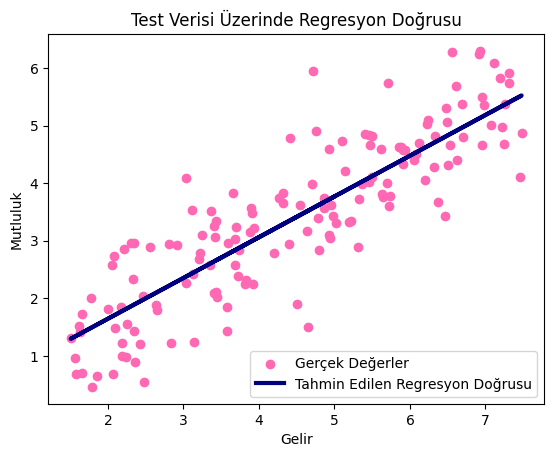

In [ ]:
# 📊 Grafik: Regresyon Doğrusunun Çizimi
plt.scatter(test.gelir, test.mutluluk, color="hotpink", label="Gerçek Değerler")
plt.plot(test.gelir, lr_tahminler, color="navy", linewidth=3, label="Tahmin Edilen Regresyon Doğrusu")
plt.title('Test Verisi Üzerinde Regresyon Doğrusu')
plt.xlabel('Gelir')
plt.ylabel('Mutluluk')
plt.legend()
plt.show()

## 📈 Grafik Analizi ve Yorumlama

Aşağıdaki grafikte, **test veri setindeki gözlemler** ile **modelin oluşturduğu regresyon doğrusu** birlikte gösterilmiştir.

- **🔴 Pembe Noktalar:** Gerçek gözlem değerlerini temsil eder. Bu noktalar, `gelir` ve `mutluluk` değişkenleri arasındaki ilişkiyi yansıtır.
- **🔵 Mavi Çizgi:** Model tarafından tahmin edilen doğrusal ilişkiyi ifade eder. Bu çizgi, eğitim verisi üzerinden elde edilen regresyon katsayılarına dayalı olarak çizilmiştir.

---

### 🔍 Grafik Üzerinden Elde Edilen Bulgular

1. **📐 Doğrusal İlişki:**  
   Gelir ile mutluluk arasında belirgin bir doğrusal ilişki gözlemlenmektedir. Regresyon doğrusu, genel veri trendini başarılı bir şekilde yansıtmaktadır.

2. **📊 Modelin Performansı:**  
   Önceki adımlarda hesaplanan R² değeri (%75) ve düşük hata metrikleri (MAE, MSE, RMSE), modelin tahmin başarısının güçlü olduğunu göstermektedir.

3. **📉 Sapmalar ve Hatalar:**  
   Gerçek veri noktalarının regresyon doğrusundan belirli uzaklıklarda dağılması, modelin hata terimleriyle (ε) açıklanmaktadır. Bu sapmalar modelin tahmin gücünün sınırlı olduğu durumları temsil eder.
